## Baseline Model

### unsuperised clustering with mean shift

https://github.com/chrischoy/segmentation_lecture/blob/master/SegmentationLecture.pdf

In [1]:
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
def load_image(image_dir, filename):
    im = np.array(Image.open(image_dir + filename).resize((224,224))) # resize to [224,224]
    if im.ndim > 2 and im.shape[2] > 3:
        im = im[..., :3]
    return im

def whiten(im):
    H, W, C = im.shape
    # Flatten
    whitened_im = im.reshape(-1, C).astype('float') #flatten to [HxW, C]
    # Whiten the feature
    whitened_im -= np.mean(whitened_im, 0)
    whitened_im /= np.sqrt(np.mean(whitened_im ** 2, 0))
    return whitened_im.reshape(H, W, C)

In [3]:
data_dir = "../../data/sample_data/train_image/"
filename = "20180503_ANIMAL1_0min.jpg"

In [4]:
# Get vectorized image
im = load_image(data_dir, filename)
H, W = im.shape[:2]
im_norm = whiten(im)

### mean-shift

In [5]:
ms = MeanShift(bandwidth=1, bin_seeding=True)
ms.fit(im_norm.reshape(-1, im_norm.shape[2]))
labels = ms.labels_

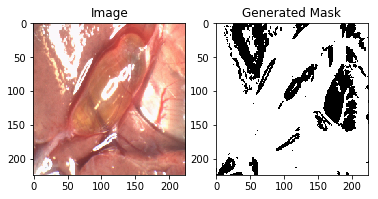

<Figure size 432x288 with 0 Axes>

In [6]:
## visualize
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(1-labels.reshape(H, W), cmap='gray')
plt.title("Generated Mask")
plt.show()